# 0009.0001 Model Review - Basic Classification Models

In [1]:
import pathlib
import sys

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

sys.path.append('..')
# OPTIONAL: Load the "autoreload" extension so that code can change
%load_ext autoreload
# OPTIONAL: always reload modules so that as you change code in src, it gets loaded
%autoreload 2

from src.data.utils import get_clean_season, make_interim_data, get_interim_data_fps
from src.model_selection.resampling import league_split
from src.metrics.rps_metrics import rps_mean

## Make interim Data and Take a Peek

In [5]:
# The file name contains the seson range 19XX-20YY.csv
# Extract a single season from the interim data
fl = get_interim_data_fps()
season = get_clean_season(fl[0], '2012-2013')
season.sort_values(by='date')
season.head(15)

,date,season,h,a,h_goals,a_goals,h_shots,a_shots,h_sot,a_sot,hwin_odds,draw_odds,awin_odds,result,h_phwinodds,a_pdrawodds,a_pawinodds
0,2012-08-18,2012-2013,Arsenal,Sunderland,0,0,14,3,4,2,1.44,4.72,8.71,draw,0.680082,0.207482,0.112436
1,2012-08-18,2012-2013,Fulham,Norwich,5,0,11,4,9,2,1.84,3.75,4.75,hwin,0.532471,0.261266,0.206263
2,2012-08-18,2012-2013,Newcastle,Tottenham,2,1,6,12,4,6,2.83,3.35,2.72,hwin,0.346594,0.292795,0.360611
3,2012-08-18,2012-2013,QPR,Swansea,0,5,20,12,11,8,2.00,3.53,4.15,awin,0.488162,0.276579,0.235259
4,2012-08-18,2012-2013,Reading,Stoke,1,1,9,6,3,3,2.47,3.30,3.22,draw,0.397525,0.297541,0.304934
5,2012-08-18,2012-2013,West Brom,Liverpool,3,0,15,14,10,7,4.76,3.74,1.84,hwin,0.205775,0.261895,0.532330
6,2012-08-18,2012-2013,West Ham,Aston Villa,1,0,8,10,4,6,2.14,3.50,3.71,hwin,0.456987,0.279415,0.263599
7,2012-08-19,2012-2013,Man City,Southampton,3,2,20,9,15,6,1.13,9.38,26.18,hwin,0.859378,0.103529,0.037093
8,2012-08-19,2012-2013,Wigan,Chelsea,0,2,12,5,4,3,4.92,3.77,1.81,awin,0.199073,0.259799,0.541128
9,2012-08-20,2012-2013,Everton,Man United,1,0,16,12,7,7,3.91,3.59,2.06,hwin,0.250803,0.273159,0.476039


## Custom Cross Validation

In [3]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

X = season[['h_shots', 'a_shots', 'h_sot', 'a_sot']]
y = season['result']

league_cv = league_split(season)

model = GaussianNB()
results = cross_val_score(model, X, y, cv=league_cv)
print(results)

[0.4        0.5        0.6        0.6        0.5        0.5
 0.2        0.4        0.5        0.4        0.2        0.44444444
 0.54545455 0.4        0.72727273 0.55555556 0.45454545 0.33333333
 0.44444444 0.4        0.5        0.6        0.7        0.4
 0.66666667 0.5        0.44444444 0.3        0.22222222 0.55555556
 0.6        0.33333333 0.7        0.4       ]


## Custom Scoring

In [5]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.dummy import DummyClassifier

X = season[['h_shots', 'a_shots', 'h_sot', 'a_sot']]
y = season['result']

league_cv = league_split(season)

dummy_est = DummyClassifier(strategy='most_frequent', random_state=0) 
naive_bayes = GaussianNB()

dumm_results = cross_val_score(dummy_est, X, y, cv=league_cv, scoring=rps_mean)

league_cv = league_split(season)
nb_results = cross_val_score(naive_bayes, X, y, cv=league_cv, scoring=rps_mean)
print(dumm_results.mean())
print(nb_results.mean())

-0.4318850267379679
-0.23298319100734546


## Sanity Check

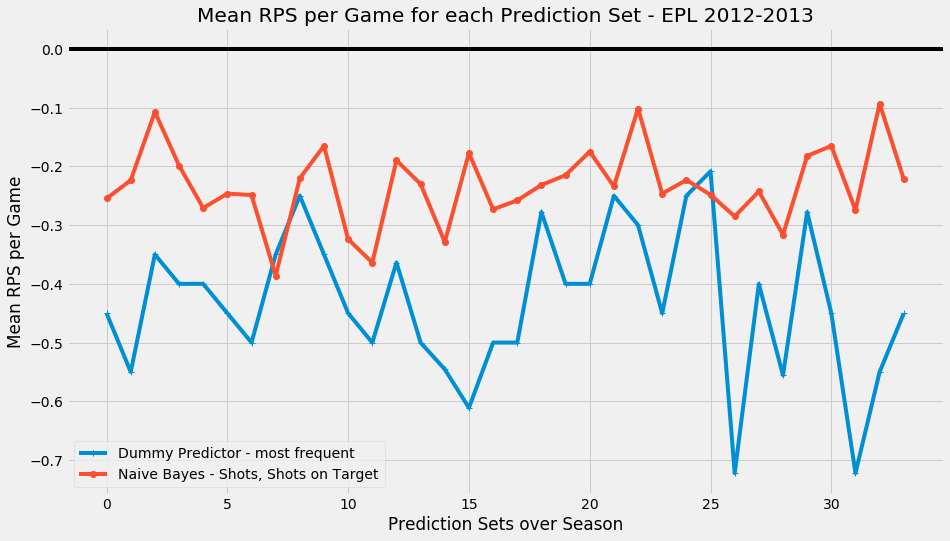

In [6]:
plt.style.use('fivethirtyeight')
fig, (ax1) = plt.subplots(ncols=1, nrows=1,figsize=(14,8), sharex=True)


ax1.plot(dumm_results, '+-', label='Dummy Predictor - most frequent')
ax1.plot(nb_results, 'o-', label='Naive Bayes - Shots, Shots on Target')
ax1.axhline(0, color='k')
ax1.set_title('Mean RPS per Game for each Prediction Set - EPL 2012-2013')
ax1.set_xlabel('Prediction Sets over Season')
ax1.set_ylabel('Mean RPS per Game')

plt.legend()

plt.show();

I think I see an upward trend in the Naive Bayes. This would make sense - The model predicts better as it gets more of the season data to train on

## Pipelines

### Data

In [7]:
# The file name contains the seson range 19XX-20YY.csv
# Extract a single season from the interim data
from src.data.utils import get_clean_season, get_interim_data_fps

file_path_list = get_interim_data_fps()
season = get_clean_season(file_path_list[0], '2012-2013')
season.sort_values(by='date')
season.head()

,date,season,h,a,h_goals,a_goals,h_shots,a_shots,h_sot,a_sot,hwin_odds,draw_odds,awin_odds,result,h_phwinodds,a_pdrawodds,a_pawinodds
0,2012-08-18,2012-2013,Arsenal,Sunderland,0,0,14,3,4,2,1.44,4.72,8.71,draw,0.680082,0.207482,0.112436
1,2012-08-18,2012-2013,Fulham,Norwich,5,0,11,4,9,2,1.84,3.75,4.75,hwin,0.532471,0.261266,0.206263
2,2012-08-18,2012-2013,Newcastle,Tottenham,2,1,6,12,4,6,2.83,3.35,2.72,hwin,0.346594,0.292795,0.360611
3,2012-08-18,2012-2013,QPR,Swansea,0,5,20,12,11,8,2.00,3.53,4.15,awin,0.488162,0.276579,0.235259
4,2012-08-18,2012-2013,Reading,Stoke,1,1,9,6,3,3,2.47,3.30,3.22,draw,0.397525,0.297541,0.304934


### Features

In [9]:
X_train = season[['h_shots', 'a_shots', 'h_sot', 'a_sot', 'h_phwinodds', 'a_pawinodds']].astype(float)
y_train = season['result']

### Some Pipelines

In [10]:
# Some import duplication in here to make this a standalone template
from sklearn.model_selection import cross_val_score
from src.model_selection.resampling import league_split

from src.metrics.rps_metrics import rps_mean

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.dummy import DummyClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, NuSVC
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, \
                            GradientBoostingClassifier, AdaBoostClassifier

pipelines = []
pipelines.append(('Scale-Dummy', Pipeline([('Scale', StandardScaler()),
                                        ('Dummy-most freq', DummyClassifier(strategy='most_frequent'))])))
pipelines.append(('NB', Pipeline([('Gaussian-Naive-Bayes', GaussianNB())])))
pipelines.append(('Scale-NB', Pipeline([('Scale', StandardScaler()),
                                        ('Gaussian-Naive-Bayes', GaussianNB())])))
pipelines.append(('Scale-BNB', Pipeline([('Scale', StandardScaler()),
                                        ('Bernoulli-Naive-Bayes', BernoulliNB())])))
pipelines.append(('SVC', Pipeline([('Support-Vector-Class', SVC(gamma='auto', probability=True))])))
pipelines.append(('Scale-SVC', Pipeline([('Scale', StandardScaler()),
                                         ('Support-Vector-Class', SVC(gamma='auto', probability=True))])))
pipelines.append(('Scale-NuSVC', Pipeline([('Scale', StandardScaler()),
                                         ('NuSupport-Vector-Class', NuSVC(gamma='auto',
                                                                          probability=True))])))
pipelines.append(('Scale-KNNC', Pipeline([('Scale', StandardScaler()),
                                         ('KNeighborsClassifier', KNeighborsClassifier(n_neighbors=7))])))
pipelines.append(('LDA', Pipeline([('LDA', LinearDiscriminantAnalysis())])))
pipelines.append(('Scale-LDA', Pipeline([('Scale', StandardScaler()),
                                         ('Linear-Discriminant-Analysis',
                                          LinearDiscriminantAnalysis())])))
pipelines.append(('Scale-LDA-lsqr', Pipeline([('Scale', StandardScaler()),
                                         ('Linear-Discriminant-Analysis',
                                          LinearDiscriminantAnalysis(solver='lsqr',
                                                                     shrinkage='auto',
                                                                    tol=1.0e-7))])))
pipelines.append(('Scale-LDA-eigen', Pipeline([('Scale', StandardScaler()),
                                         ('Linear-Discriminant-Analysis',
                                          LinearDiscriminantAnalysis(solver='eigen',
                                                                     shrinkage='auto',
                                                                    tol=1.0e-7))])))
pipelines.append(('Scale-RFC', Pipeline([('Scale', StandardScaler()),
                                         ('Random-Forest-Classifier',
                                         RandomForestClassifier(n_estimators=100))])))
pipelines.append(('Scale-ETC', Pipeline([('Scale', StandardScaler()),
                                         ('Extra-Trees-Classifier',
                                         ExtraTreesClassifier(n_estimators=100))])))
pipelines.append(('Scale-GBC', Pipeline([('Scale', StandardScaler()),
                                         ('Gradient-Boosting-Classifier',
                                         GradientBoostingClassifier(learning_rate=0.001))])))
pipelines.append(('Scale-ABC', Pipeline([('Scale', StandardScaler()),
                                         ('AdaBoost-Classifier',
                                         AdaBoostClassifier(base_estimator=SVC(probability=True),
                                                           algorithm='SAMME',
                                                           n_estimators=100,
                                                           learning_rate=0.1))])))


# Run Models
results = {}
for name, model in pipelines:
    pred_set_splits = league_split(season)
    cv_results = cross_val_score(model, X_train, y_train, cv=pred_set_splits, scoring=rps_mean)
    results[name] = cv_results
results_df = pd.DataFrame(results)
print(results_df.head())

   Scale-Dummy        NB  Scale-NB  Scale-BNB       SVC  Scale-SVC  \
0        -0.50 -0.196155 -0.196155  -0.159753 -0.226949  -0.203805   
1        -0.50 -0.186773 -0.186773  -0.239112 -0.341593  -0.290853   
2        -0.55 -0.146933 -0.146933  -0.129269 -0.168247  -0.173557   
3        -0.25 -0.243198 -0.243198  -0.215913 -0.211888  -0.197848   
4        -0.35 -0.201012 -0.201012  -0.175775 -0.219970  -0.186937   

   Scale-NuSVC  Scale-KNNC       LDA  Scale-LDA  Scale-LDA-lsqr  \
0    -0.216652   -0.171429 -0.216726  -0.216726       -0.187477   
1    -0.252043   -0.210204 -0.223792  -0.223792       -0.206131   
2    -0.149216   -0.168367 -0.102836  -0.102836       -0.111768   
3    -0.213092   -0.270408 -0.183431  -0.183431       -0.184868   
4    -0.172037   -0.171429 -0.188592  -0.188592       -0.185452   

   Scale-LDA-eigen  Scale-RFC  Scale-ETC  Scale-GBC  Scale-ABC  
0        -0.174968  -0.207550  -0.220165  -0.225265  -0.238592  
1        -0.196059  -0.197485  -0.180960  -0.2

### Analysis of Results

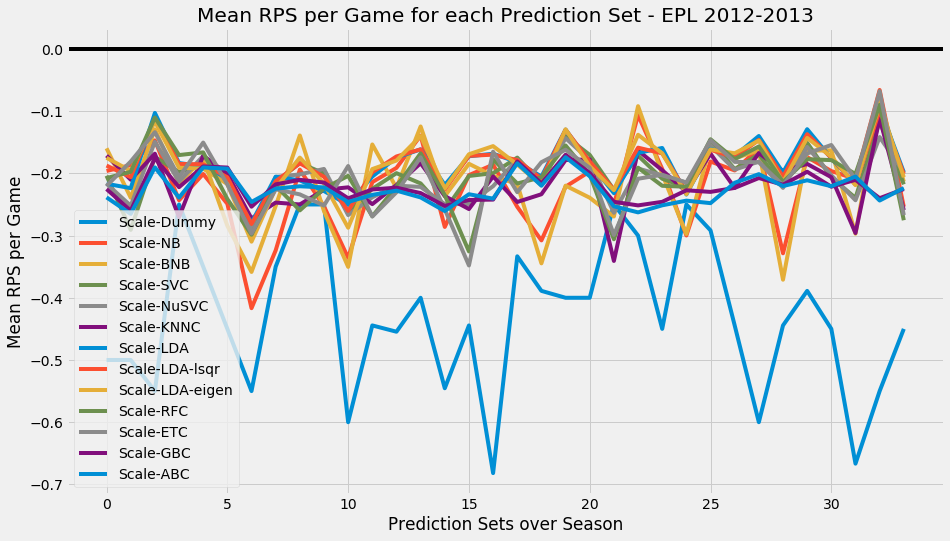

In [11]:
plt.style.use('fivethirtyeight')
fig, (ax1) = plt.subplots(ncols=1, nrows=1,figsize=(14,8), sharex=True)

for col in results_df.columns:
    if 'Scale' in col:
        ax1.plot(results[col], label=col)
# ax1.plot(results['NB'], label='Naive Bayes')
# ax1.plot(results['Scale-NB'], label='Scaled Naive Bayes')
# ax1.plot(results['SVC'], label='SVC')
# ax1.plot(results['Scale-SVC'], label='Scaled SVC')

ax1.axhline(0, color='k')
ax1.set_title('Mean RPS per Game for each Prediction Set - EPL 2012-2013')
ax1.set_xlabel('Prediction Sets over Season')
ax1.set_ylabel('Mean RPS per Game')

plt.legend()

plt.show();

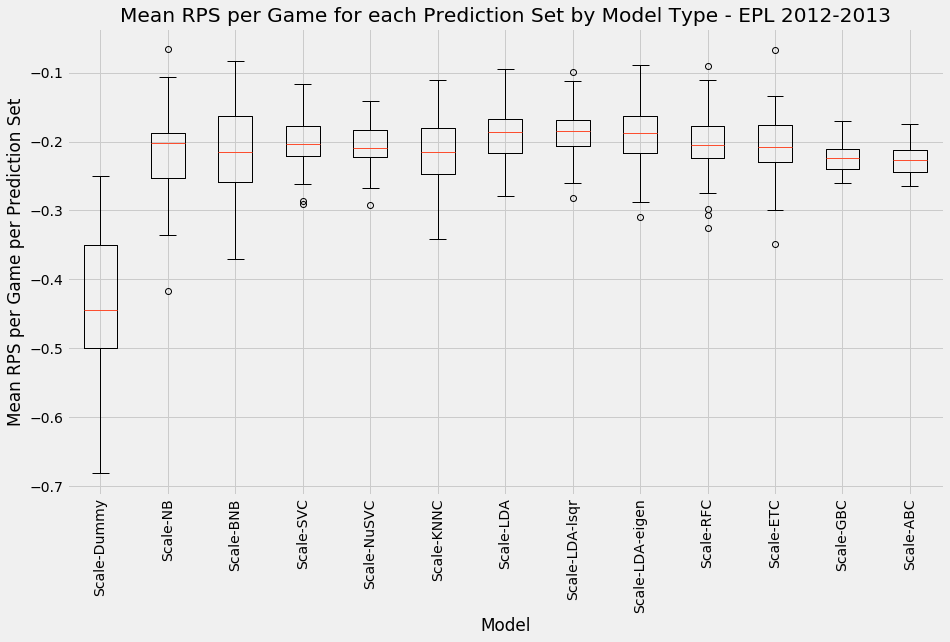

In [12]:
plt.style.use('fivethirtyeight')
fig, (ax1) = plt.subplots(ncols=1, nrows=1,figsize=(14,8), sharex=True)


ax1.boxplot([results_df[col] for col in results_df.columns if 'Scale' in col],
            labels = [col for col in results_df.columns if 'Scale' in col])
ax1.set_title('Mean RPS per Game for each Prediction Set by Model Type - EPL 2012-2013')
ax1.set_xlabel('Model')
ax1.set_ylabel('Mean RPS per Game per Prediction Set')
plt.xticks(rotation=90)

plt.show();

How does this compare to RPS from Pinnacle Odds